## Happiness index


Consider the World_Happiness_Index dataset, where 146 countries are ranked by decreasing happiness. Prepare 4 dimension reduction data visualization using PCA, MDS, tSNE and UMAP with optimized parameters, comment on differences and similarities among the four plots, and discuss the obtained clusters with respect to the original ranking.

https://drive.google.com/file/d/1IauliZDWuhwy8sLfCAbBxOcqNd8MCpbU/view

In [1]:
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/marty/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv('/Users/marty/Downloads/World Happiness Report 2022.csv')

In [3]:
d = df['Dystopia (1.83) + residual']
d.mean()

happ = df['Happiness score']

In [4]:
print(d)

0      2.518
1      2.226
2      2.320
3      2.153
4      2.137
       ...  
141    0.187
142    0.536
143    0.548
144    0.216
145    1.263
Name: Dystopia (1.83) + residual, Length: 146, dtype: float64


Proviamo a plottare il df Dystopia

[Text(0, 0.5, 'Frequency'), Text(0.5, 1.0, 'Frequency Histogram')]

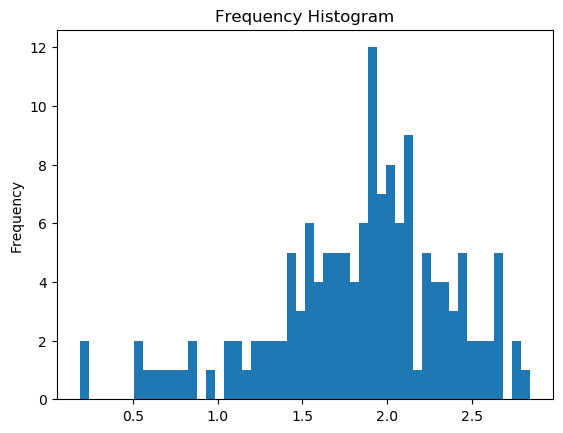

In [5]:

plt.hist(d, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')


BOX PLOT comparing happiness vs. dystopia

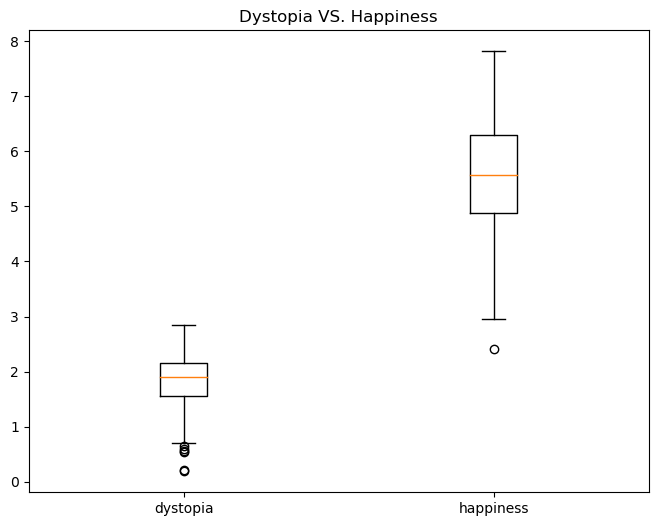

In [6]:
fig = plt.figure(figsize =(8, 6))
data = [d, happ]
plt.boxplot(data)

plt.title("Dystopia VS. Happiness")
plt.xticks([1,2],['dystopia', 'happiness'])

plt.show()

In [6]:
df = df.rename(columns={"Happiness score": "Happiness_score"})

Ho deciso di aggiungere una colonna con solo gli integere dell'happiness score.

In [4]:
def round_half_up(n, decimals=0):
    multiplier = 10 ** decimals
    return int(math.floor(n*multiplier + 0.5) / multiplier)


In [7]:
import math
new_array = [round_half_up(x,0) for x in df['Happiness_score']]
df['y'] = new_array

In [8]:
df

,RANK,Country,Happiness_score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,y
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534,8
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532,8
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191,8
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461,8
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,142,Botswana*,3.471,3.667,3.275,0.187,1.503,0.815,0.280,0.571,0.012,0.102,3
142,143,Rwanda*,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544,3
143,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105,3
144,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034,3


## PCA

Secondo me la mia y è Happiness Score, che è un float.

In [11]:
# drop Country column because I cannot work with a string when I use the function fit_transform()

df = df.drop(columns = ['Country','Happiness_score', 'RANK', 'Whisker-high',
                        'Whisker-low', 'Dystopia (1.83) + residual'])

In [12]:
feat_cols = df.columns
#= df['Happiness score'].cat.codes
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (146, 7)


In [13]:
print(feat_cols)

Index(['Explained by: GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'y'],
      dtype='object')


In [14]:
df[feat_cols].values

array([[1.892e+00, 1.258e+00, 7.750e-01, ..., 1.090e-01, 5.340e-01,
        8.000e+00],
       [1.953e+00, 1.243e+00, 7.770e-01, ..., 1.880e-01, 5.320e-01,
        8.000e+00],
       [1.936e+00, 1.320e+00, 8.030e-01, ..., 2.700e-01, 1.910e-01,
        8.000e+00],
       ...,
       [9.470e-01, 6.900e-01, 2.700e-01, ..., 1.060e-01, 1.050e-01,
        3.000e+00],
       [1.392e+00, 4.980e-01, 6.310e-01, ..., 8.200e-02, 3.400e-02,
        3.000e+00],
       [7.580e-01, 0.000e+00, 2.890e-01, ..., 8.900e-02, 5.000e-03,
        2.000e+00]])

In [15]:
from sklearn.preprocessing import StandardScaler

scal = df.iloc[:,:6].values
scal = StandardScaler().fit_transform(scal) 

In [16]:
import numpy as np

print(np.mean(scal))
print(np.std(scal))

-6.488974755800001e-17
1.0


In [18]:
pca = PCA(n_components=3) # creates a PCA object
# compute PCA and transform the data
pca_result = pca.fit_transform(scal) # this code performs the actual transformation 
#print(pca_result)

# save to dataframe
df['pca-one'] = pca_result[:, 0]
df['pca-two'] = pca_result[:, 1] 
df['pca-three'] = pca_result[:, 2] 

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.50672521 0.19734559 0.12940761]


In [19]:
df

,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,y,pca-one,pca-two,pca-three
0,1.892,1.258,0.775,0.736,0.109,0.534,8,-3.270891,0.658505,1.937651
1,1.953,1.243,0.777,0.719,0.188,0.532,8,-3.258399,1.362276,1.548598
2,1.936,1.320,0.803,0.718,0.270,0.191,8,-2.580050,1.204553,-1.154907
3,2.026,1.226,0.822,0.677,0.147,0.461,8,-3.166959,0.583895,1.300841
4,1.945,1.206,0.787,0.651,0.271,0.419,7,-2.732691,1.710766,0.473214
...,...,...,...,...,...,...,...,...,...,...
141,1.503,0.815,0.280,0.571,0.012,0.102,3,0.871518,-1.066674,0.583315
142,0.785,0.133,0.462,0.621,0.187,0.544,3,1.203099,2.396421,3.532170
143,0.947,0.690,0.270,0.329,0.106,0.105,3,2.466941,-0.407176,0.408433
144,1.392,0.498,0.631,0.103,0.082,0.034,3,1.998634,-1.919840,0.173810


/Users/marty/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  if __name__ == "__main__":


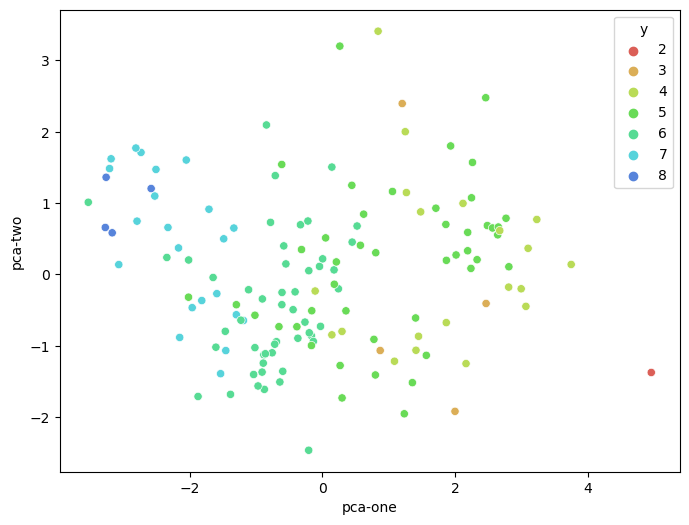

In [21]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    x="pca-one", y="pca-two",
    hue = 'y',
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=1
)

plt.show()

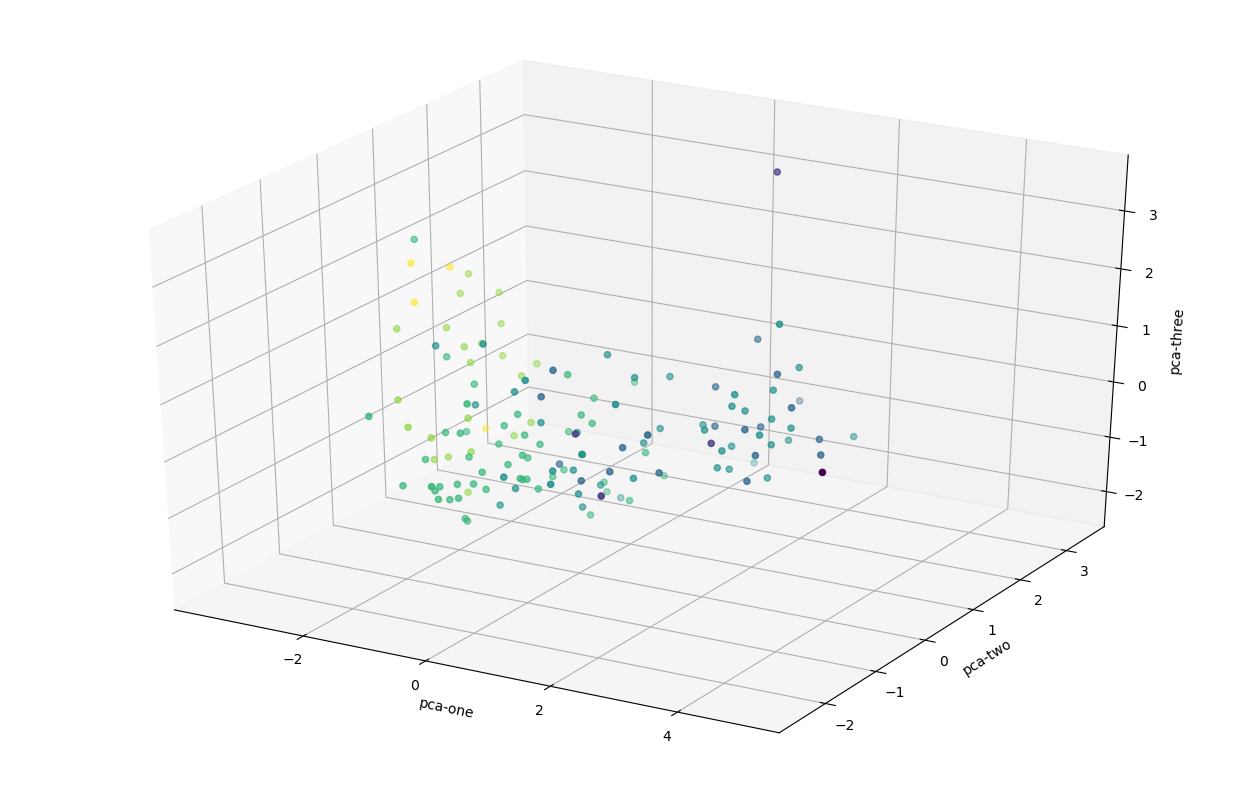

In [22]:
fig = plt.figure(figsize=(16, 10))

ax = plt.axes(projection='3d')

ax.scatter(xs=df["pca-one"], ys=df["pca-two"], zs=df["pca-three"],
    c = df['y'])
    #palette=sns.color_palette("hls", 7),
    #data=df,
    #legend="full",
    #alpha=1)

ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')

plt.show()

### MDS

In [23]:
from sklearn.manifold import MDS

components=2

mds = MDS(random_state=42,n_components=components, verbose=1, metric = True)
mds_emb = mds.fit_transform(df.iloc[:,:6]) # scal

df['mds-one'] = mds_emb[:, 0]
df['mds-two'] = mds_emb[:, 1]

# metric -> bool, default=True
# If True, perform metric MDS; otherwise, perform nonmetric MDS.
# When False (i.e. non-metric MDS), dissimilarities with 0 are considered as missing values.

# dissimilarity{‘euclidean’, ‘precomputed’}, default=’euclidean’
# Dissimilarity measure to use:
# ‘euclidean’: Pairwise Euclidean distances between points in the dataset.
# ‘precomputed’: Pre-computed dissimilarities are passed directly to fit and fit_transform.


breaking at iteration 174 with stress 79.4661706945675
breaking at iteration 52 with stress 111.98845006164109
breaking at iteration 84 with stress 105.11993215632731
breaking at iteration 71 with stress 77.32319104812393


/Users/marty/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  


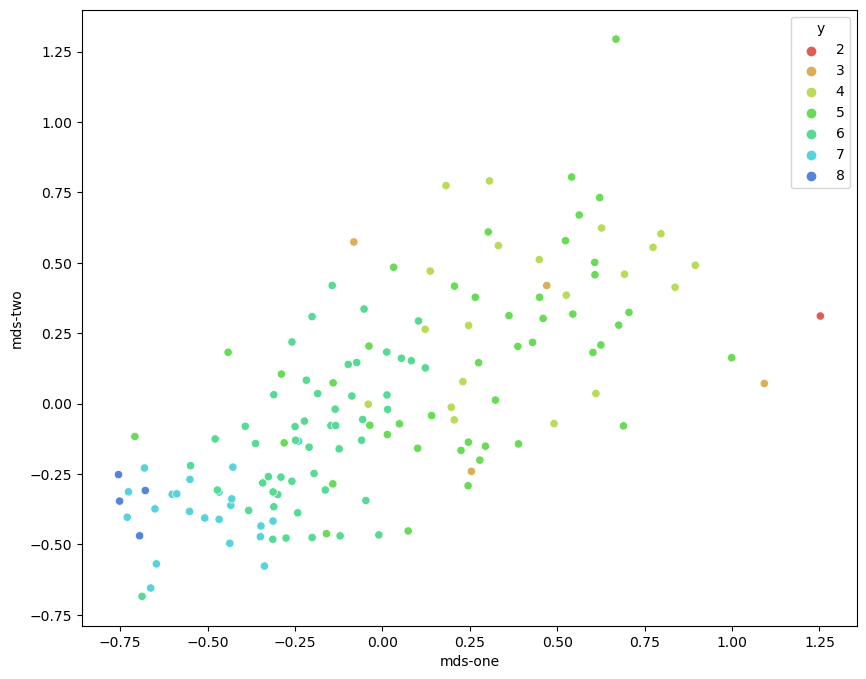

In [25]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    x="mds-one", y="mds-two",
    hue='y',
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha = 1
)

### t-SNE

Ho usato i dati scalati: 
https://stats.stackexchange.com/questions/164917/should-data-be-centeredscaled-before-applying-t-sne

In [26]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=700)
tsne_results = tsne.fit_transform(scal) # df.iloc[:,:6]
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
#df['tsne-2d-three'] = tsne_results[:,2]

# Perplexity:
# Expected number of neighbours within a cluster
# Larger datasets usually require a larger perplexity.

/Users/marty/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/marty/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 145 nearest neighbors...
[t-SNE] Indexed 146 samples in 0.000s...
[t-SNE] Computed neighbors for 146 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 146 / 146
[t-SNE] Mean sigma: 1.400751
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.731186
[t-SNE] KL divergence after 700 iterations: 0.249296


In [27]:
df

,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,y,pca-one,pca-two,pca-three,mds-one,mds-two,tsne-2d-one,tsne-2d-two
0,1.892,1.258,0.775,0.736,0.109,0.534,8,-3.270891,0.658505,1.937651,-0.755104,-0.251905,-0.178347,10.204481
1,1.953,1.243,0.777,0.719,0.188,0.532,8,-3.258399,1.362276,1.548598,-0.751911,-0.345937,0.186737,10.142893
2,1.936,1.320,0.803,0.718,0.270,0.191,8,-2.580050,1.204553,-1.154907,-0.678358,-0.308388,1.058376,8.565991
3,2.026,1.226,0.822,0.677,0.147,0.461,8,-3.166959,0.583895,1.300841,-0.694652,-0.469042,-0.112742,9.839353
4,1.945,1.206,0.787,0.651,0.271,0.419,7,-2.732691,1.710766,0.473214,-0.650814,-0.373596,0.703532,9.664835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,1.503,0.815,0.280,0.571,0.012,0.102,3,0.871518,-1.066674,0.583315,0.254415,-0.240281,-0.264441,1.734849
142,0.785,0.133,0.462,0.621,0.187,0.544,3,1.203099,2.396421,3.532170,1.092298,0.071587,3.605963,0.181346
143,0.947,0.690,0.270,0.329,0.106,0.105,3,2.466941,-0.407176,0.408433,0.470080,0.419434,0.392778,-0.228239
144,1.392,0.498,0.631,0.103,0.082,0.034,3,1.998634,-1.919840,0.173810,-0.081834,0.573936,-2.024430,1.262649


/Users/marty/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  


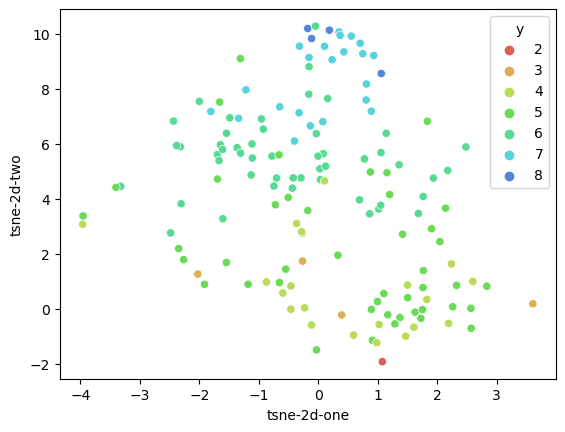

In [28]:
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='y',
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full"
)

Comparison !!

/Users/marty/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  # This is added back by InteractiveShellApp.init_path()
/Users/marty/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.


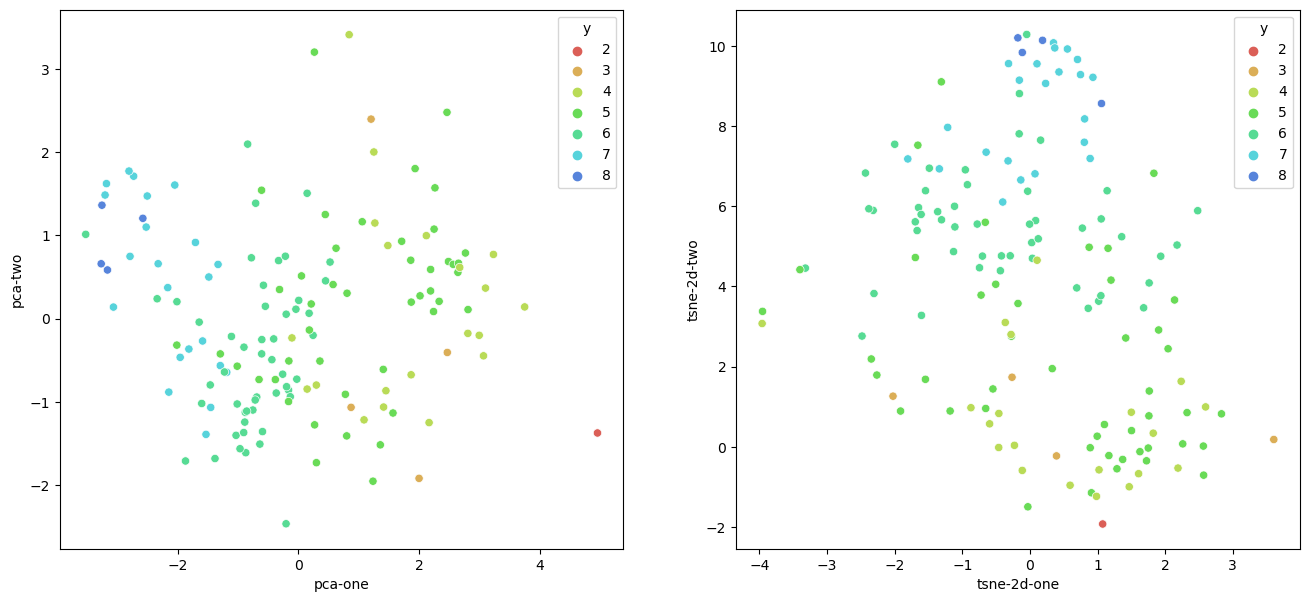

In [30]:
plt.figure(figsize=(16, 7))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue='y',
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=1,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='y',
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=1,
    ax=ax2
)

plt.show()

Proviamo unendo PCA e t-SNE

In [31]:
pca_3 = PCA(n_components=3)
pca_result_3 = pca_3.fit_transform(scal)

print('Cumulative explained variation for 3 principal components: {}'.format(np.sum(pca_3.explained_variance_ratio_)))


Cumulative explained variation for 3 principal components: 0.8334784129494719


In [32]:
#time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300, init='random', learning_rate=200)
tsne_pca_results = tsne.fit_transform(pca_result_3)
#print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))


/Users/marty/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  
/Users/marty/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
/Users/marty/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.


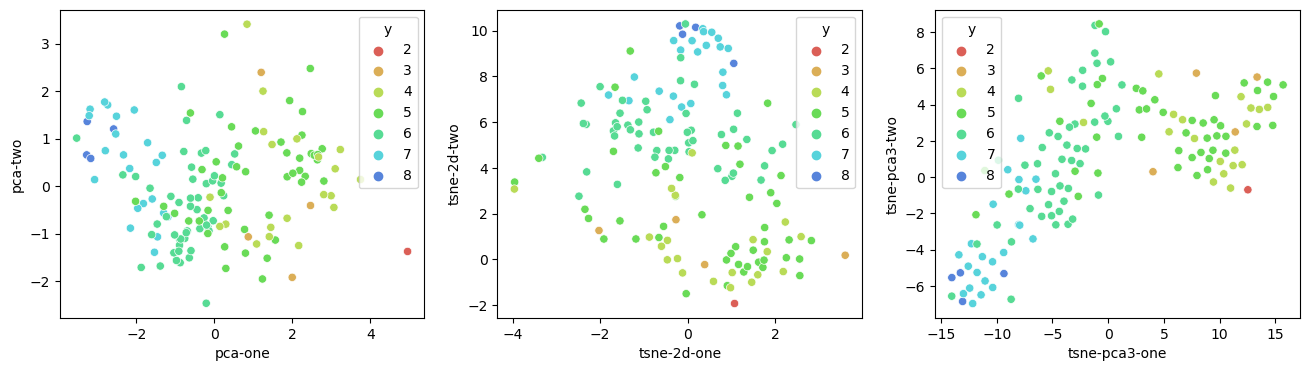

In [34]:
df['tsne-pca3-one'] = tsne_pca_results[:, 0] 
df['tsne-pca3-two'] = tsne_pca_results[:, 1]

plt.figure(figsize=(16, 4))

ax1 = plt.subplot(1, 3, 1) # pca
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue='y',
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=1,
    ax=ax1
)

ax2 = plt.subplot(1, 3, 2) # tsne from the full dimensinality dataset 
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='y',
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=1,
    ax=ax2
)

ax3 = plt.subplot(1, 3, 3) # tsne of the 50 components
sns.scatterplot(
    x="tsne-pca3-one", y="tsne-pca3-two",
    hue='y',
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=1,
    ax=ax3
)

plt.show()

### UMAP

In [17]:
import umap

reducer = umap.UMAP(n_neighbors=100, min_dist = 1).fit(scal) # df.iloc[:,:6]

df['umap-one'] = reducer.embedding_[:, 0]
df['umap-two'] = reducer.embedding_[:, 1]
#df['umap-three'] = reducer.embedding_[:, 2]

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


/Users/marty/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  


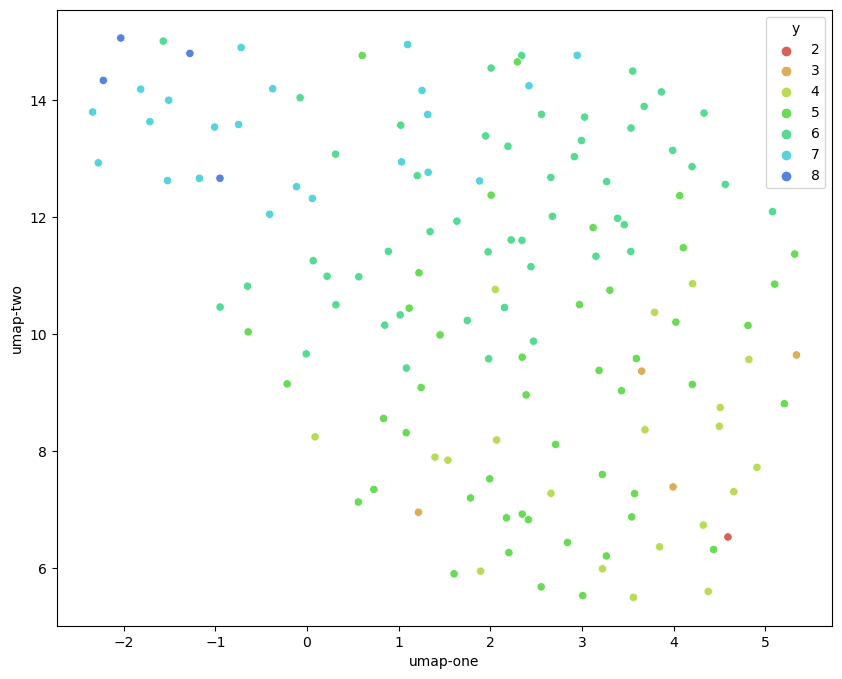

In [18]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    x="umap-one", y="umap-two",
    hue='y',
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha = 1
)

Proviamo differenza tra train e test set 

In [19]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import matthews_corrcoef

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:6],df['y'],
                                                    test_size=0.25, # default
                                                    random_state=42) # set the random seed for reproducibility

In [21]:
X_train

,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
84,1.625,1.163,0.640,0.563,0.123,0.021
68,1.538,1.003,0.577,0.606,0.084,0.179
51,1.591,1.116,0.568,0.589,0.131,0.107
135,1.167,0.376,0.471,0.647,0.198,0.123
134,0.771,0.322,0.360,0.292,0.174,0.132
...,...,...,...,...,...,...
71,1.508,0.958,0.705,0.656,0.099,0.142
106,1.289,0.682,0.554,0.328,0.147,0.046
14,1.886,1.188,0.783,0.659,0.217,0.368
92,0.785,0.621,0.369,0.367,0.388,0.103


In [40]:
tf = umap.UMAP(n_neighbors=5, random_state=42).fit(X_train)

/Users/marty/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  if __name__ == "__main__":


Text(0.5, 1.0, 'Embedding of the train set by UMAP')

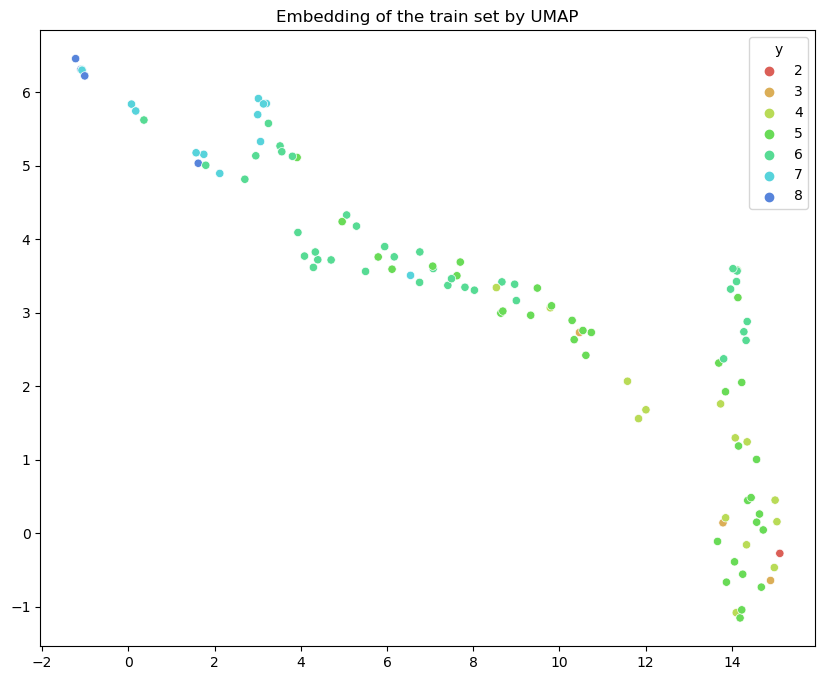

In [41]:
plt.figure(figsize=(10,8))

sns.scatterplot(
    x=tf.embedding_[:, 0], y=tf.embedding_[:, 1],
    hue=y_train,
    palette=sns.color_palette("hls", 10),
    data=X_train,
    legend="full",
    alpha = 1
)
plt.title('Embedding of the train set by UMAP', fontsize=12)

In [42]:
test_embedding = tf.transform(X_test)

In [43]:
y_test.unique() 

array([6, 5, 7, 3, 4])

/Users/marty/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  if __name__ == "__main__":


Text(0.5, 1.0, 'Embedding of the test set by UMAP')

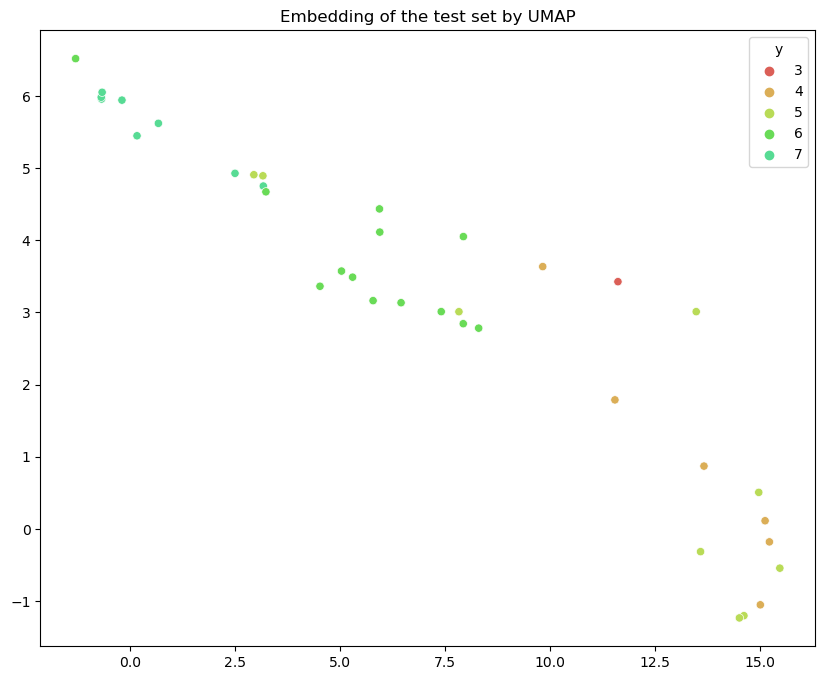

In [44]:
plt.figure(figsize=(10,8))

sns.scatterplot(
    x=test_embedding[:, 0], y=test_embedding[:, 1],
    hue=y_test,
    palette=sns.color_palette("hls", 10),
    data=X_test,
    legend="full",
    alpha = 1
)

plt.title('Embedding of the test set by UMAP', fontsize=12)


# NUOVO DATASET 
## Leucemia

Consider the datafile Leukemia.csv, collecting the expression of 7129 genes of 72 leukemia patients, belonging to 4 different classes B-cell, T-cell, BM, BP, as indicated in the lastcolumn of the .csv file.

Using the tSNE dimensionality reduction planar (2D) projection on the 7129 describing features, color the
samples according to their class and discuss if the 4 groups of patients can be well separated into two distinct groups in the projection.

Repeat the same process with the MDS algorithm and compare the two results.

In [3]:
leucemia = pd.read_csv('/Users/marty/Downloads/Leukemia.csv')

In [7]:
leucemia.columns

Index(['AFFX-BioB-5_at', 'AFFX-BioB-M_at', 'AFFX-BioB-3_at', 'AFFX-BioC-5_at',
       'AFFX-BioC-3_at', 'AFFX-BioDn-5_at', 'AFFX-BioDn-3_at',
       'AFFX-CreX-5_at', 'AFFX-CreX-3_at', 'AFFX-BioB-5_st',
       ...
       'U58516_at', 'U73738_at', 'X06956_at', 'X16699_at', 'X83863_at',
       'Z17240_at', 'L49218_f_at', 'M71243_f_at', 'Z78285_f_at', 'Class'],
      dtype='object', length=7130)

In [9]:
leucemia['Class'].unique() # queste sono le 4 diverse 

array(['B-cell', 'BM', 'PB', 'T-cell'], dtype=object)

### PCA

In [10]:
leucemia

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,Class
0,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,1023,67,214,-135,1074,475,48,168,-70,B-cell
1,-87,-248,262,295,-226,-493,367,-452,194,162,...,529,-295,352,-67,67,263,-33,-33,-21,B-cell
2,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,383,46,104,15,245,164,84,100,-18,B-cell
3,22,-153,17,276,-211,-250,55,-141,0,500,...,399,16,558,24,893,297,6,1971,-42,B-cell
4,86,-36,-141,252,-201,-384,-420,-197,-60,-468,...,91,-84,615,-52,1235,9,7,1545,-81,B-cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-20,-207,-50,101,-369,-529,14,-365,153,29,...,1009,-55,139,-57,834,557,-12,335,-65,BM
68,7,-100,-57,132,-377,-478,-351,-290,283,247,...,336,-45,170,12,752,295,28,1558,-67,BM
69,-213,-252,136,318,-209,-557,40,-243,119,-131,...,1653,67,486,-88,1293,342,26,246,23,BM
70,-25,-20,124,325,-396,-464,-221,-390,-1,358,...,486,-32,334,35,1733,304,12,3193,-33,BM


!!! Convertire le 4 diverse classi in integers !!!

In [15]:
leucemia['Class'].unique()

array(['B-cell', 'BM', 'PB', 'T-cell'], dtype=object)

In [19]:
## funzione
def convInt(df):
    new_array = []
    for el in df['Class']:
        if el == 'B-cell':
            val = 0
        elif el == 'BM':
            val = 1
        elif el == 'PB':
            val = 2
        elif el == 'T-cell':
            val = 3
        new_array.append(val)
    return new_array
    


In [20]:
## conversione 
new_array = convInt(leucemia)
leucemia['y'] = new_array

In [24]:
leucemia = leucemia.drop(['Class'], axis = 1)

In [27]:
feat_cols = leucemia.columns
feat_cols

Index(['AFFX-BioB-5_at', 'AFFX-BioB-M_at', 'AFFX-BioB-3_at', 'AFFX-BioC-5_at',
       'AFFX-BioC-3_at', 'AFFX-BioDn-5_at', 'AFFX-BioDn-3_at',
       'AFFX-CreX-5_at', 'AFFX-CreX-3_at', 'AFFX-BioB-5_st',
       ...
       'U58516_at', 'U73738_at', 'X06956_at', 'X16699_at', 'X83863_at',
       'Z17240_at', 'L49218_f_at', 'M71243_f_at', 'Z78285_f_at', 'y'],
      dtype='object', length=7130)

In [35]:
pca = PCA(n_components=4) # creates a PCA object
# compute PCA and transform the data
pca_result = pca.fit_transform(leucemia[feat_cols].values) # this code performs the actual transformation 
#print(pca_result)

# save to dataframe
leucemia['pca-one'] = pca_result[:, 0]
leucemia['pca-two'] = pca_result[:, 1] 
leucemia['pca-three'] = pca_result[:, 2]
leucemia['pca-four'] = pca_result[:, 3]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.17427768 0.10338643 0.0769023  0.05853238]


In [36]:
leucemia

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,y,pca-one,pca-two,pca-three,pca-four
0,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,1074,475,48,168,-70,0,23228.248419,-10207.144168,-24864.170575,7800.291716
1,-87,-248,262,295,-226,-493,367,-452,194,162,...,67,263,-33,-33,-21,0,7327.107342,-8114.543146,-9592.584130,-15562.042324
2,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,245,164,84,100,-18,0,7571.530901,-20789.272596,15751.422720,-21830.917507
3,22,-153,17,276,-211,-250,55,-141,0,500,...,893,297,6,1971,-42,0,-5088.367209,-2548.717195,-21366.142065,-2778.422526
4,86,-36,-141,252,-201,-384,-420,-197,-60,-468,...,1235,9,7,1545,-81,0,46933.842349,-2660.217249,-1134.095089,-21072.205775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-20,-207,-50,101,-369,-529,14,-365,153,29,...,834,557,-12,335,-65,1,-13397.870649,15856.667025,13033.346408,-418.219627
68,7,-100,-57,132,-377,-478,-351,-290,283,247,...,752,295,28,1558,-67,1,55580.974377,-8850.342264,2182.080380,11707.697903
69,-213,-252,136,318,-209,-557,40,-243,119,-131,...,1293,342,26,246,23,1,-14975.491982,78660.978586,-17523.670242,22289.212271
70,-25,-20,124,325,-396,-464,-221,-390,-1,358,...,1733,304,12,3193,-33,1,-27661.185054,50949.095241,2065.810354,1638.356853


/Users/marty/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  if __name__ == "__main__":


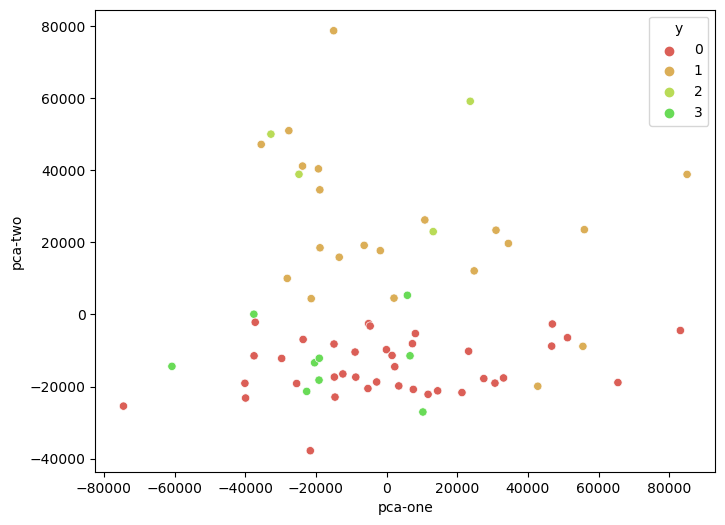

In [33]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    x="pca-one", y="pca-two",
    hue = 'y',
    palette=sns.color_palette("hls", 10),
    data=leucemia,
    legend="full",
    alpha=1
)

plt.show()

### tSNE

In [40]:
np.random.seed(42)
rndperm = np.random.permutation(leucemia.shape[0])

In [41]:
rndperm

array([ 4, 62, 18,  0, 28, 50, 10, 34, 12, 54, 47, 31,  9, 45,  5, 22, 56,
       49, 33, 39, 59, 16, 35, 44, 69,  7, 55, 42, 30, 46, 71, 19, 58, 25,
       40, 13, 64,  3, 17, 38,  8, 57,  6, 36, 66, 53, 70, 15, 27, 41, 26,
       48, 24, 61, 65, 11, 32, 68, 63, 37, 29, 43, 67,  1, 52, 21,  2, 23,
       20, 60, 14, 51])

In [42]:
N = 10000
df_subset = leucemia.loc[rndperm[:N], :].copy()
data_subset = df_subset[feat_cols].values

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)

df_subset['pca-one'] = pca_result[:, 0]
df_subset['pca-two'] = pca_result[:, 1] 
df_subset['pca-three'] = pca_result[:, 2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.17427768 0.10338643 0.0769023 ]


In [43]:
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/Users/marty/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/marty/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 71 nearest neighbors...
[t-SNE] Indexed 72 samples in 0.001s...
[t-SNE] Computed neighbors for 72 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 72 / 72
[t-SNE] Mean sigma: 46926.011947
[t-SNE] KL divergence after 250 iterations with early exaggeration: 115.438232
[t-SNE] KL divergence after 300 iterations: 1.664509
t-SNE done! Time elapsed: 0.3524479866027832 seconds


/Users/marty/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  del sys.path[0]


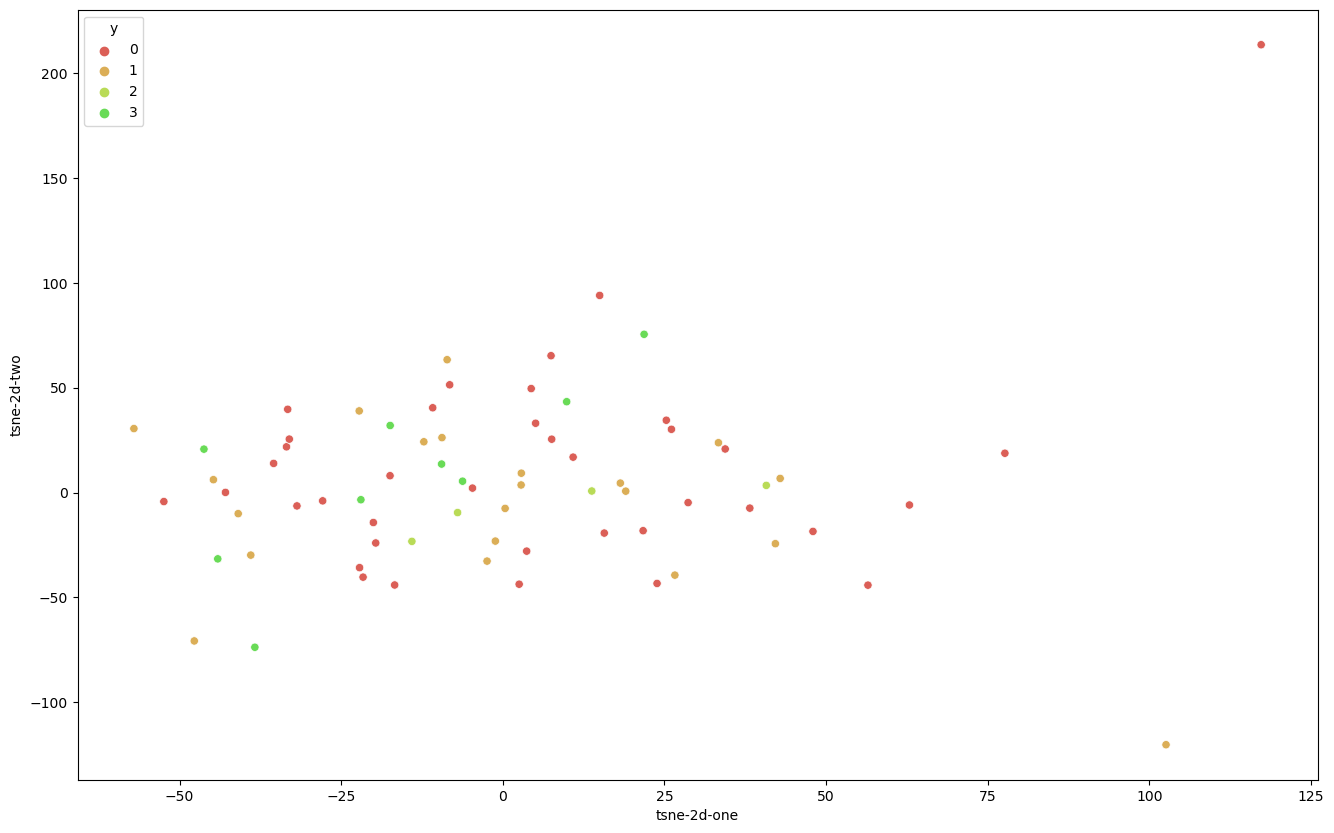

In [45]:
df_subset['tsne-2d-one'] = tsne_results[:, 0]
df_subset['tsne-2d-two'] = tsne_results[:, 1]
df_subset['tsne-2d-three'] = tsne_results[:, 2]

plt.figure(figsize=(16, 10))

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=1
)

plt.show()

### MDS

In [63]:
from sklearn.manifold import MDS

mds = MDS(random_state=42,
          n_components=3, 
          verbose=1)

mds_emb = mds.fit_transform(leucemia)
mds_df = pd.DataFrame(mds_emb, columns = [f'PC{i+1}' for i in range(3)])


breaking at iteration 130 with stress 665764579184.0637
breaking at iteration 172 with stress 665764518954.1459
breaking at iteration 174 with stress 665764540784.4221
breaking at iteration 138 with stress 665764494386.6677


In [64]:
mds_df

,PC1,PC2,PC3
0,-29064.148566,130648.892621,-72136.332217
1,-45120.853991,44523.755134,-11423.773733
2,-64541.006654,29374.310611,-65190.025968
3,34785.719089,81886.820000,-57556.383908
4,-112732.402983,113318.690488,28145.262206
...,...,...,...
67,16175.869852,-65514.784783,-95468.588768
68,-95641.403985,134033.407524,-62842.423147
69,-92747.836702,-164544.994464,-14536.464866
70,-2957.742212,-157754.975072,23428.967722


In [68]:
y = leucemia['y']

/Users/marty/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  if __name__ == "__main__":


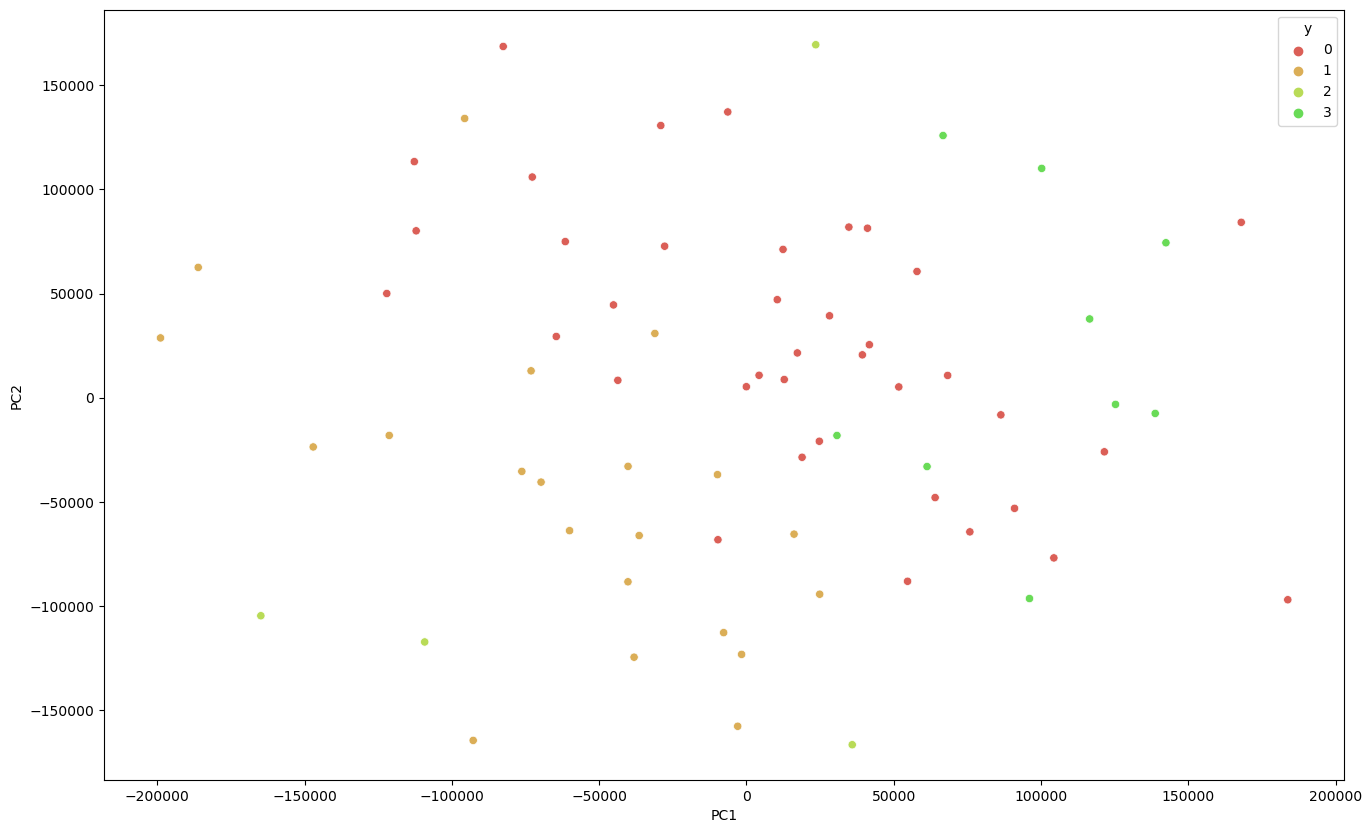

In [69]:
plt.figure(figsize=(16, 10))

sns.scatterplot(
    x="PC1", y="PC2",
    hue=y,
    palette=sns.color_palette("hls", 10),
    data=mds_df,
    legend="full",
    alpha=1
)

plt.show()